# Group 6 Mini Project 2


# 1. Data Preprocessing [4 points]

 Read the text data from the respective folders into a single variable 
 
 The Variable will  have list of sentences from the text in each .txt file in all the folders 
 
 Convert the variable into corresponding feature vectors as below. Perform pre-processing step of stopword removal from text.  [1 pt]
 
 For each title text, convert it into corresponding TF-IDF vector. [1 pt]
 
 TF-IDF vectors are sparse and of large dimension. Reduce them into only 2 dimensions using PCA. [2 pt] 

In [1]:
#Imports
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# for integer encoding using sklearn
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns
from matplotlib import style
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
from tkinter import *
from tkinter.font import Font
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from pyclustertend import hopkins
from sklearn.decomposition import PCA
from tqdm import tqdm 
from math import sqrt 
from time import gmtime, strftime
from sklearn.cluster import KMeans
import os
##print(os.listdir("../input"))
sns.set()
from sklearn import preprocessing as pp
from sklearn.cluster import KMeans
import random
import pylab as pl
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN,AgglomerativeClustering, KMeans
from apyori import apriori
######## Capture the start time to check the runt ime of the whole notebook #########
startTime = strftime("%a, %d %b %Y %H:%M:%S +0000", gmtime())
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re  #regular expression
from bs4 import BeautifulSoup
sw = stopwords.words('english')
stemmer = SnowballStemmer("english")
url_re = r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))'


C:\Users\jaghos\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\jaghos\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
C:\Users\jaghos\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  stacklevel=1)
C:\Users\jaghos\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Extract and read text files

path = 'problem_statement_2-Copy\\problem_statement_2\\'
sentence = pd.DataFrame()
for directory in os.listdir(path):
        print('extracting data for directory '+directory)
        for filename in tqdm(os.listdir(path+'\\'+directory),position=0, leave=True):
            with open(os.path.join(path+'\\'+directory, filename)) as f:
                observation = f.read()
                current_df = pd.DataFrame({'sentences': [observation]})
                sentence = sentence.append(current_df, ignore_index=True)
               
print(sentence)

extracting data for directory business


100%|███████████████████████████████████████████████████████████████████████████████| 510/510 [00:01<00:00, 377.64it/s]


extracting data for directory entertainment


100%|███████████████████████████████████████████████████████████████████████████████| 386/386 [00:00<00:00, 405.50it/s]


extracting data for directory politics


100%|███████████████████████████████████████████████████████████████████████████████| 417/417 [00:01<00:00, 406.61it/s]


extracting data for directory sport


100%|███████████████████████████████████████████████████████████████████████████████| 511/511 [00:01<00:00, 404.10it/s]


extracting data for directory tech


100%|███████████████████████████████████████████████████████████████████████████████| 401/401 [00:01<00:00, 391.22it/s]


                                              sentences
0     Ad sales boost Time Warner profit\n\nQuarterly...
1     Dollar gains on Greenspan speech\n\nThe dollar...
2     Yukos unit buyer faces loan claim\n\nThe owner...
3     High fuel prices hit BA's profits\n\nBritish A...
4     Pernod takeover talk lifts Domecq\n\nShares in...
...                                                 ...
2220  BT program to beat dialler scams\n\nBT is intr...
2221  Spam e-mails tempt net shoppers\n\nComputer us...
2222  Be careful how you code\n\nA new European dire...
2223  US cyber security chief resigns\n\nThe man mak...
2224  Losing yourself in online gaming\n\nOnline rol...

[2225 rows x 1 columns]


In [3]:
#Sentence curation functions
def stopwords(text):
    '''a function for removing the stopword'''
    
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

def stemming(text):    
    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)     

def remove_html(text):
    '''
    remove the HTML tags and URLS from the tweets
    '''
    if text:
        # BeautifulSoup on content
        soup = BeautifulSoup(text, "html.parser")
        # Stripping all <code> tags with their content if any
        if soup.code:
            soup.code.decompose()
        # Get all the text out of the html
        text =  soup.get_text()
        # Returning text stripping out all uris
        return re.sub(url_re, "", text)
    else:
        return ""
    
def remove_emojis(text):
    
    emoji_pattern = re.compile("["
        r"\U0001F600-\U0001F64F"  # emoticons
        r"\U0001F300-\U0001F5FF"  # symbols & pictographs
        r"\U0001F680-\U0001F6FF"  # transport & map symbols
        r"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)# no emoji 
  
    return text

In [4]:
## Remove unwanted words ##

sentence_duplicate = sentence.copy()
sentence['sentences'] = sentence['sentences'].apply(remove_html)
sentence['sentences'] = sentence['sentences'].apply(remove_emojis)
sentence['sentences'] = sentence['sentences'].apply(remove_punctuation)
sentence['sentences'] = sentence['sentences'].apply(stopwords)
sentence_duplicate = sentence.copy()
sentence['sentences'] = sentence['sentences'].apply(stemming)

print(sentence)

                                              sentences
0     ad sale boost time warner profit quarter profi...
1     dollar gain greenspan speech dollar hit highes...
2     yuko unit buyer face loan claim owner embattl ...
3     high fuel price hit bas profit british airway ...
4     pernod takeov talk lift domecq share uk drink ...
...                                                 ...
2220  bt program beat dialler scam bt introduc two i...
2221  spam email tempt net shopper comput user acros...
2222  care code new european direct could put softwa...
2223  us cyber secur chief resign man make sure us c...
2224  lose onlin game onlin role play game timeconsu...

[2225 rows x 1 columns]


In [5]:
## Extract TF-IDF Vector ##

# instantiate the vectorizer object
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')
# convert th sentences into a matrix
#hf = sentence['sentences'].values #[" ".join(review) for review in sentence['sentences'].values]
hf = [" ".join(review) for review in sentence['sentences'].values]
'''
for review in tqdm(sentence['sentences'].values):
    hf = hf + " " + review
'''
#print(hf)
tfidf_wm = tfidfvectorizer.fit_transform(sentence['sentences'])# becauase TFIDF vectorizer takes texts and not lists
#retrieve the terms found in the corpora


tfidf_tokens = tfidfvectorizer.get_feature_names()
df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),columns = tfidf_tokens)#index = ['Doc1','Doc2'])

print("\nTD-IDF Vectorizer\n")
print(df_tfidfvect)


TD-IDF Vectorizer

       00  000  0001  00051  001  002  003  004sec  007   01  ...  zoom  \
0     0.0  0.0   0.0    0.0  0.0  0.0  0.0     0.0  0.0  0.0  ...   0.0   
1     0.0  0.0   0.0    0.0  0.0  0.0  0.0     0.0  0.0  0.0  ...   0.0   
2     0.0  0.0   0.0    0.0  0.0  0.0  0.0     0.0  0.0  0.0  ...   0.0   
3     0.0  0.0   0.0    0.0  0.0  0.0  0.0     0.0  0.0  0.0  ...   0.0   
4     0.0  0.0   0.0    0.0  0.0  0.0  0.0     0.0  0.0  0.0  ...   0.0   
...   ...  ...   ...    ...  ...  ...  ...     ...  ...  ...  ...   ...   
2220  0.0  0.0   0.0    0.0  0.0  0.0  0.0     0.0  0.0  0.0  ...   0.0   
2221  0.0  0.0   0.0    0.0  0.0  0.0  0.0     0.0  0.0  0.0  ...   0.0   
2222  0.0  0.0   0.0    0.0  0.0  0.0  0.0     0.0  0.0  0.0  ...   0.0   
2223  0.0  0.0   0.0    0.0  0.0  0.0  0.0     0.0  0.0  0.0  ...   0.0   
2224  0.0  0.0   0.0    0.0  0.0  0.0  0.0     0.0  0.0  0.0  ...   0.0   

      zooropa  zornotza  zorro  zubair  zuluaga  zurich  zuton  zvonareva  \
0 



hopkins value  0.05083563721197394


Prinical components formed 

       PCA COMPONENT 1  PCA COMPONENT 2
0           -0.044626         0.115435
1            0.033837         0.119329
2            0.011887         0.073210
3           -0.013764         0.098854
4           -0.028714         0.025723
...               ...              ...
2220        -0.032797         0.161686
2221        -0.026372         0.155279
2222         0.028690         0.080570
2223         0.014943         0.050600
2224        -0.095555        -0.053555

[2225 rows x 2 columns]


FINAL PLOT OF CLUSTERS BELOW BASED ON PCA


<Figure size 2880x2880 with 0 Axes>

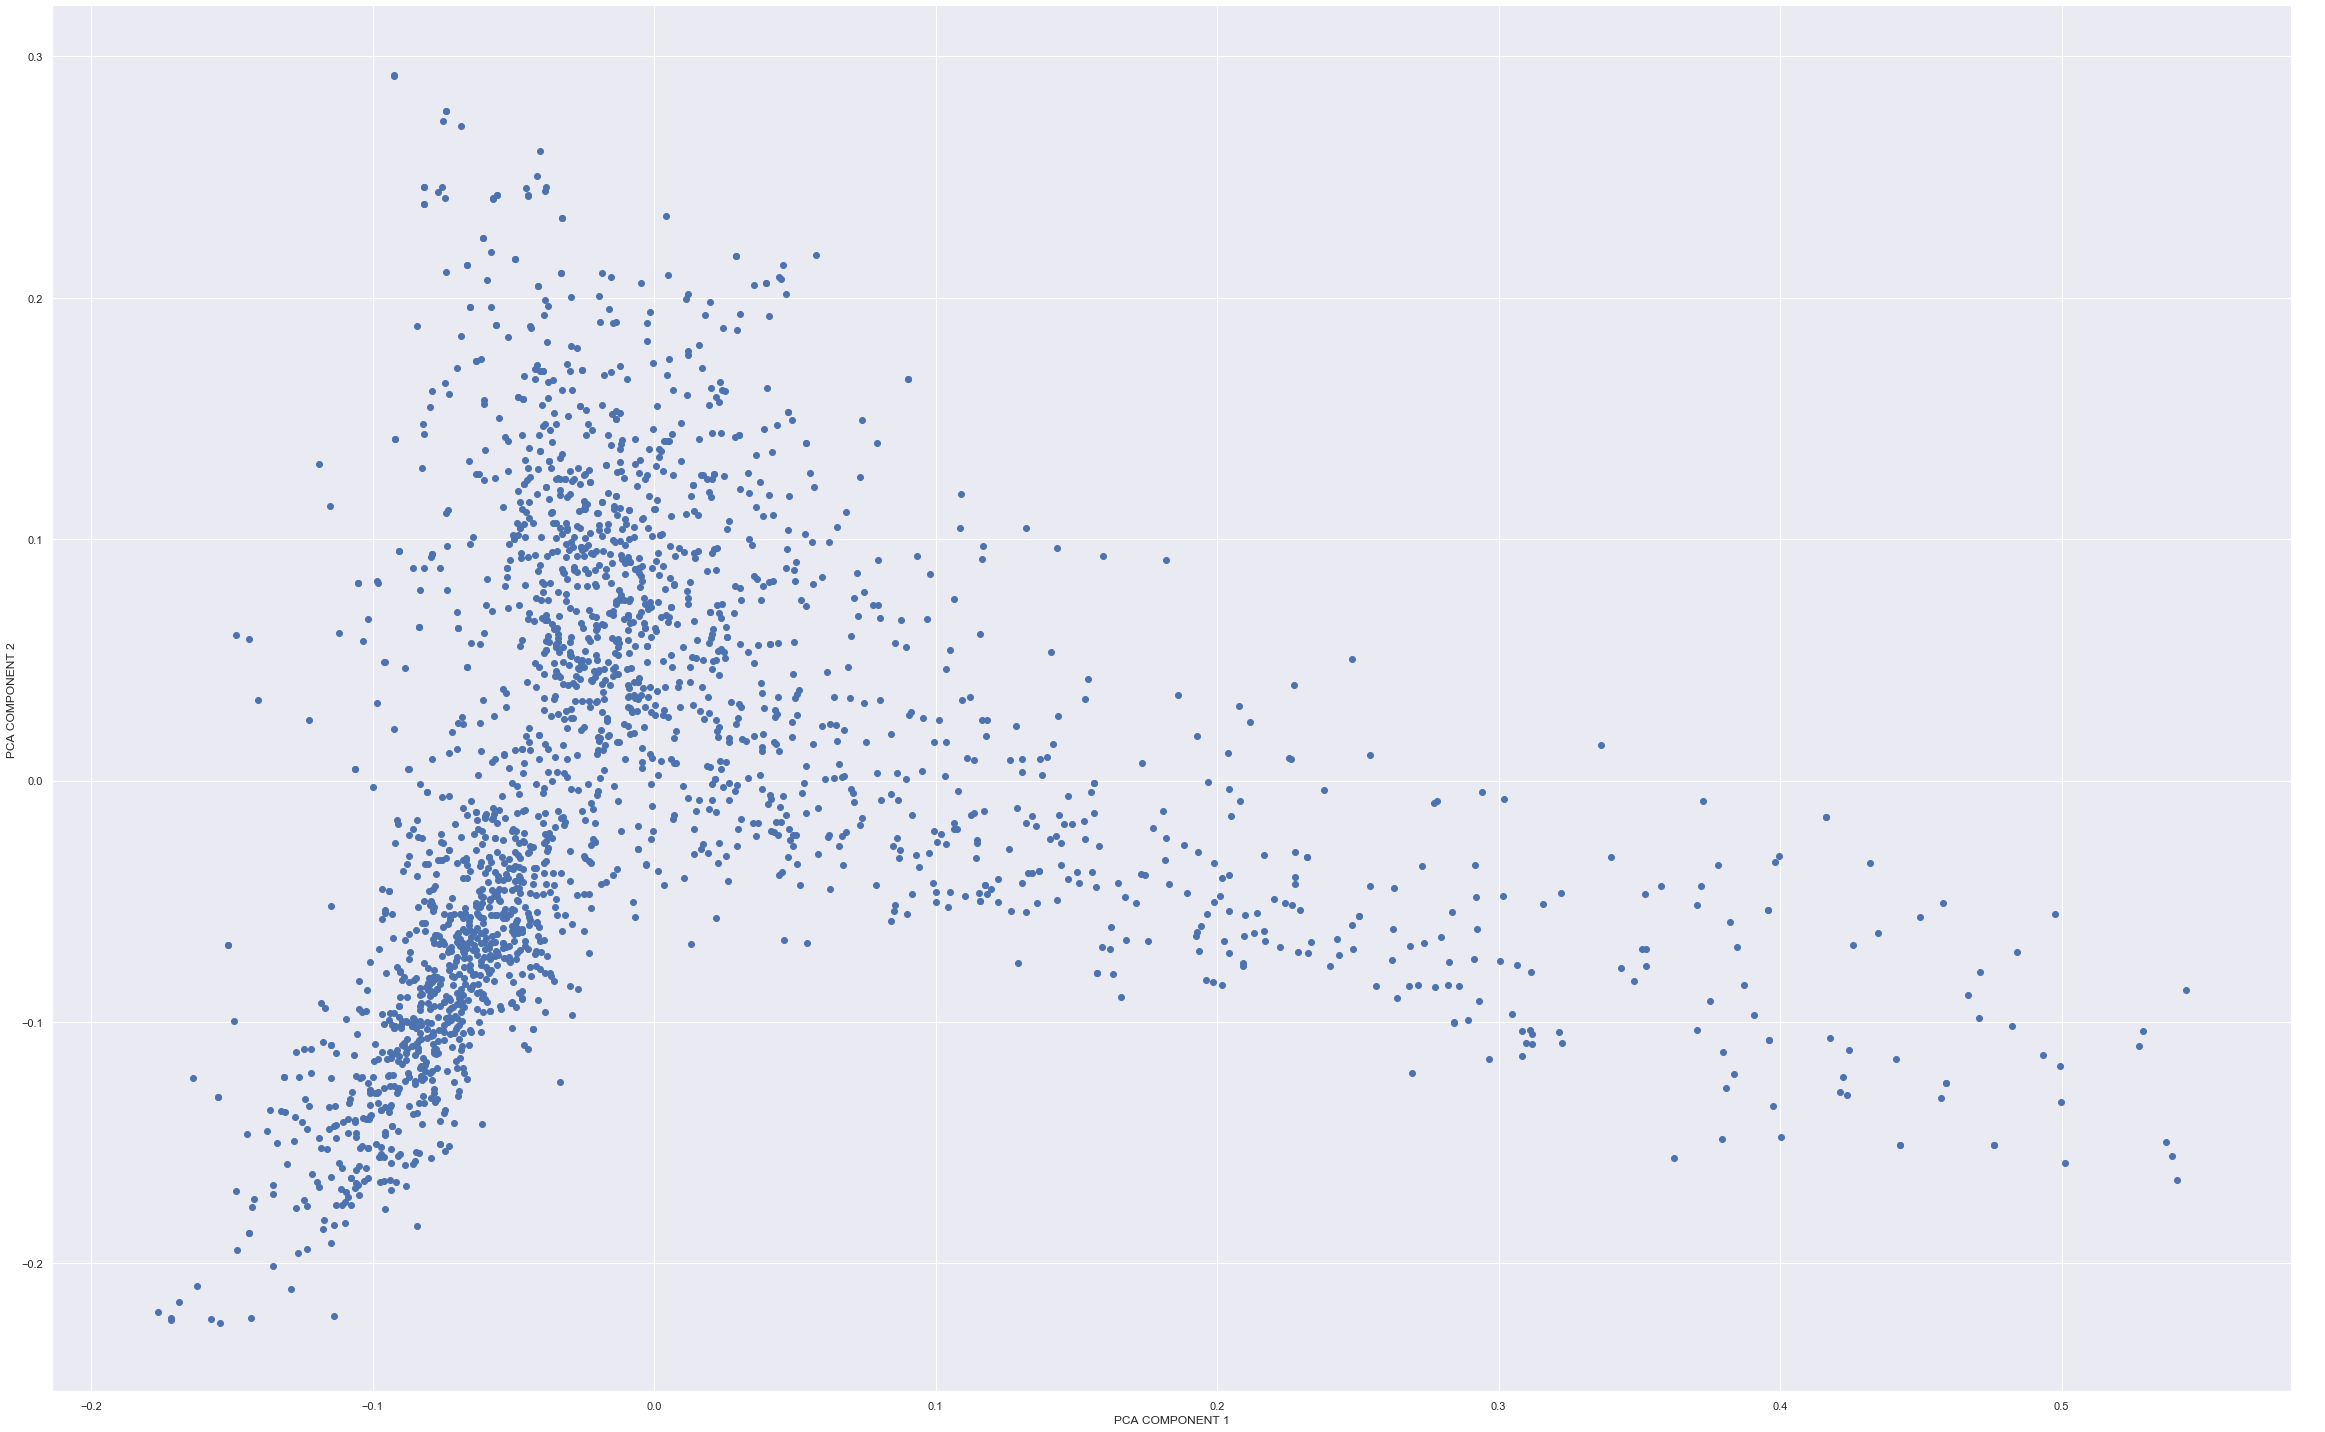

In [6]:
#Complete the PCA

X = np.array(df_tfidfvect)
#print("\n\nhopkins value ",hopkins(X, X.shape[0]))

#Recheck clustering tendency by doing PCA on two components and plotting the scatter plot

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)
X_pca = pd.DataFrame(X_pca,columns = ['PCA COMPONENT 1','PCA COMPONENT 2'])
print("\n\nhopkins value ",hopkins(X_pca, X_pca.shape[0]))
print("\n\nPrinical components formed \n\n",X_pca)
print("\n\nFINAL PLOT OF CLUSTERS BELOW BASED ON PCA")
plt.figure(figsize=(40, 40))
fg = sns.FacetGrid(data=X_pca,palette='Set2', aspect=1.61 , height = 20)
fg.map(plt.scatter, 'PCA COMPONENT 1', 'PCA COMPONENT 2').add_legend()
plt.show()

# CLUSTERING IMPLEMENTATION

# Build K-means

2. Perform K-means clustering for different values of K (3,4,5,6) and evaluate the quality of clustering using Silhouette score. [4 points]

a) For each value of K, plot clusters (all cluster points in same cluster with same color, cluster points in different cluster in different colors). [2 pt]

b) Draw a bar graph with X-axis as K value and Y-axis as silhouette score. [1 pt]

c) Explain (1-2 lines) which is the best clustering and why. [1 pt]

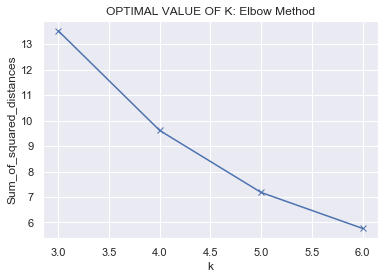

In [7]:
Sum_of_squared_distances = []
K = range(3,7)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_pca)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('OPTIMAL VALUE OF K: Elbow Method')
plt.show()

For n_clusters = 3, silhouette score is 0.5258794259704072
For n_clusters = 4, silhouette score is 0.6662832005683385
For n_clusters = 5, silhouette score is 0.8900886609881428
For n_clusters = 6, silhouette score is 0.753675869763054


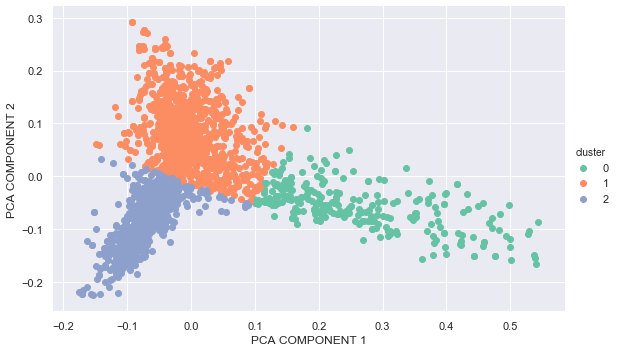

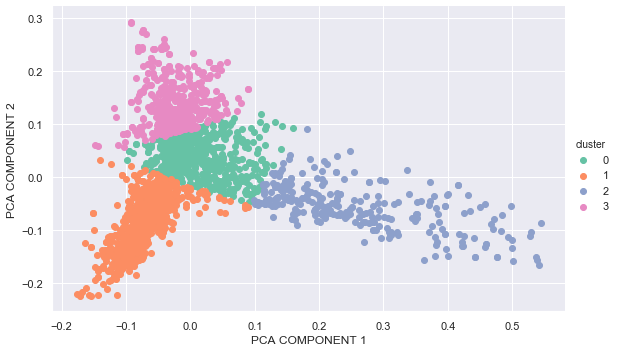

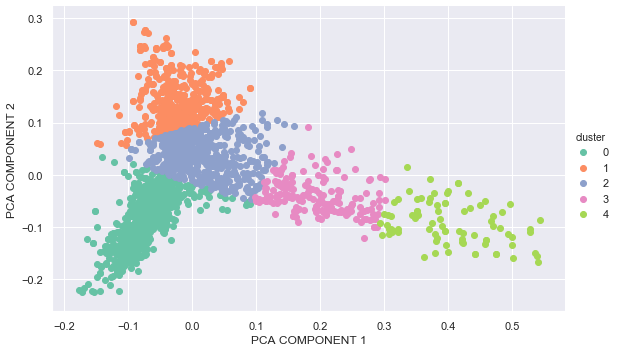

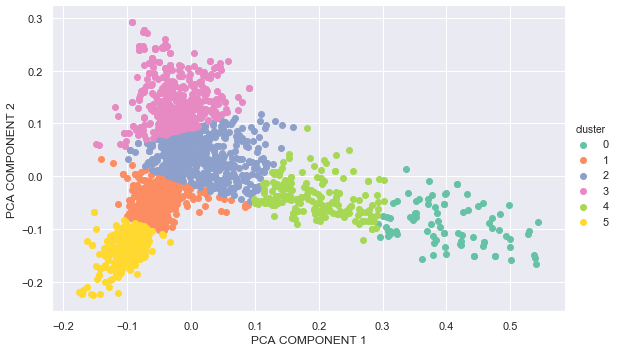

In [8]:
##Silhouette
silhouttescore = []
from sklearn.metrics import silhouette_score, silhouette_samples
#print(X_pca[:])
for n_clusters in range(3,7):
    km = KMeans (n_clusters=n_clusters)
    preds = km.fit_predict(X_pca)
    centers = km.cluster_centers_

    score = silhouette_score(X_pca, preds, metric='euclidean')
    silhouttescore.append(score)

    print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))
    labels_sample = km.labels_
    X_pca['cluster'] = labels_sample
    fg = sns.FacetGrid(data=X_pca,palette='Set2',hue='cluster', aspect=1.61, height=5)
    fg.map(plt.scatter, 'PCA COMPONENT 1', 'PCA COMPONENT 2').add_legend()
    #sns.set_palette('Set2')
    #sns.scatterplot(X_pca['PCA COMPONENT 1'],X_pca['PCA COMPONENT 2'],hue=labels_sample,palette='Set1')



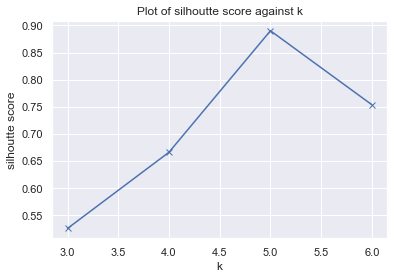

In [9]:
plt.plot(range(3,7), silhouttescore, 'bx-')
plt.xlabel('k')
plt.ylabel('silhoutte score')
plt.title('Plot of silhoutte score against k')
plt.show()

# Best Cluster 

Here cluster level 5 has the best silhoutte score which means that the clusters are more densely packed having better inter cluster clearance . Hence this is the best clustering 

# Association Rules

3. Consider the pre-processed text of all the sentences and find words which frequently occur together. [4 points]

a) More specifically, find association rules of minimum length 2 with 20% confidence and 10% support. Other parameters you are free to decide on your own. How many such rules are there? List all the rules. Interpret any one rule. [2 pt]

b) Draw a line graph with Y-axis as number of association rules of minimum length 2, and X-axis as confidence percentage (ranging from 0%, 10%, 20%, ...., 100%). Plot different colored lines for different support percentage (take values as 10%, 20%, and 50%) [2 pt]

In [10]:
#Transforming the list into a list of lists, so that each transaction can be indexed easier
transactions = []

extractedWords = pd.DataFrame()

for i in range(0, sentence_duplicate.shape[0]):

    transactions.append(sentence_duplicate.iloc[i,0].replace('[^a-zA-Z ]', '').lower().split(' ')) # we have to create a list of lists which is accepted by apriori algorithm

print(transactions[0])


['ad', 'sales', 'boost', 'time', 'warner', 'profit', 'quarterly', 'profits', 'us', 'media', 'giant', 'timewarner', 'jumped', '76', '113bn', 'â£600m', 'three', 'months', 'december', '639m', 'yearearlier', 'firm', 'one', 'biggest', 'investors', 'google', 'benefited', 'sales', 'highspeed', 'internet', 'connections', 'higher', 'advert', 'sales', 'timewarner', 'said', 'fourth', 'quarter', 'sales', 'rose', '2', '111bn', '109bn', 'profits', 'buoyed', 'oneoff', 'gains', 'offset', 'profit', 'dip', 'warner', 'bros', 'less', 'users', 'aol', 'time', 'warner', 'said', 'friday', 'owns', '8', 'searchengine', 'google', 'internet', 'business', 'aol', 'mixed', 'fortunes', 'lost', '464000', 'subscribers', 'fourth', 'quarter', 'profits', 'lower', 'preceding', 'three', 'quarters', 'however', 'company', 'said', 'aols', 'underlying', 'profit', 'exceptional', 'items', 'rose', '8', 'back', 'stronger', 'internet', 'advertising', 'revenues', 'hopes', 'increase', 'subscribers', 'offering', 'online', 'service', 'f

In [11]:
rules = apriori(transactions, min_support = 0.1, min_confidence = 0.2, min_lift = 2, min_length = 2)
# Support: number of transactions containing set of times / total number of transactions
# .      --> products that are bought at least 3 times a day --> 21 / 7501 = 0.0027
# Confidence: Should not be too high, as then this wil lead to obvious rules

#viewing the rules

results = list(rules)
print("No of rules created ",len(results))
results = pd.DataFrame(results)
print(results)
results.to_csv('Associationrules.csv') #save the file

No of rules created  6
                           items   support  \
0                    (told, bbc)  0.144270   
1              (said, told, bbc)  0.133034   
2             (would, told, bbc)  0.112809   
3        (government, would, mr)  0.110562   
4       (said, would, told, bbc)  0.104270   
5  (government, would, said, mr)  0.105618   

                                  ordered_statistics  
0  [((bbc), (told), 0.7117516629711752, 2.5666895...  
1  [((bbc), (said, told), 0.656319290465632, 2.59...  
2  [((bbc), (would, told), 0.5565410199556541, 2....  
3  [((government), (would, mr), 0.551569506726457...  
4  [((bbc), (said, would, told), 0.51441241685144...  
5  [((government), (would, said, mr), 0.526905829...  


# Interpretation of rule 0 with items(bbc , told)

The first rule which has a support value of 0.144 has items bbc and told which means that bbc and told appear together frequently which makes sense because bbc is a news channel and they will be releasing a lot of news articles. 

Support value of 0.14 means that bbc appears nearly 14% of times in all sentences . The confidence value of 0.71 means that 71% of sentences which has bbc also has the word told .Lift of 2.56 means that there is 2.56 times chance of 'told' being in a sentence with the word 'bbc' than 'told' appearing a solo word in a sentence

In [12]:
#Value for different support percentage and different confidence

GraphChart = []

for support in range(1,6):
    rules_no =[]
    print('calculating for support:{}'.format(str(support/10)))
    for confidence in tqdm(range(0,11),position=0, leave=True):
        #print('calculating for support:{} and confidence:{}'.format(str(support/10),str(confidence/10)))
        rules = apriori(transactions, min_support = support/10, min_confidence = confidence/10, min_lift = 2, min_length = 2)
        results = list(rules)
        rules_no.append(len(results))
    GraphChart.append(rules_no)
    

print (GraphChart)        

calculating for support:0.1


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:20<00:00,  1.90s/it]


calculating for support:0.2


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:04<00:00,  2.36it/s]


calculating for support:0.3


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:04<00:00,  2.58it/s]


calculating for support:0.4


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:04<00:00,  2.34it/s]


calculating for support:0.5


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:04<00:00,  2.44it/s]


[[6, 6, 6, 6, 6, 6, 6, 6, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


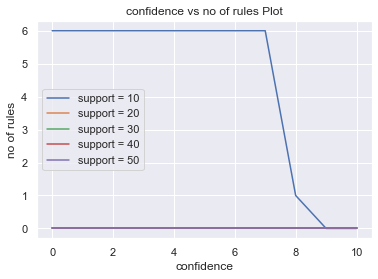

In [13]:
#Drawing the line plot

#Plot a line graph
plt.plot(range(0,11),GraphChart[0], label='support = 10')
plt.plot(range(0,11),GraphChart[1], label='support = 20')
plt.plot(range(0,11),GraphChart[2], label='support = 30')
plt.plot(range(0,11),GraphChart[3], label='support = 40')
plt.plot(range(0,11),GraphChart[4], label='support = 50')
# Add labels and title
plt.title("confidence vs no of rules Plot")
plt.xlabel("confidence")
plt.ylabel("no of rules")
 
plt.legend()
plt.show()

In [14]:
endTime = strftime("%a, %d %b %Y %H:%M:%S +0000", gmtime())
print ("Run started at : ",startTime)
print ("Run ended at : ",endTime)

Run started at :  Sat, 05 Jun 2021 06:04:22 +0000
Run ended at :  Sat, 05 Jun 2021 06:05:35 +0000
